# MET 3601 Final Exam Fall 2024

This exam can be completed by adding code to this notebook for each question. There are 4 questions worth 25 points each.

A reminder that you are on the honor code. This includes both **plagiarism** and **cheating on exams**! For more details see:  https://www.fit.edu/policies/academic/policies/academic-honesty/ 


Turn in a completed notebook, renamed as

`MET3601_Final_lastname.ipynb`

via JupyterHub and Canvas. 

**DUE DATE: 13 December 2024 at 5:00 p.m.**
This is consistent with the Monday/Wednesday 11 am scheduled classes

Be sure to cleanup and comment your code for each problem and that your output is self-describing. Also - run all cells to ensure that the code executes!

## Question #1
Jet streaks are an important component of severe weather outbreaks. The idealized (straight)jetstreak model is comprised of two favorable regions for convection, i.e. the right front (entrance) and left rear (exit) where there tends to be rising motion. 

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;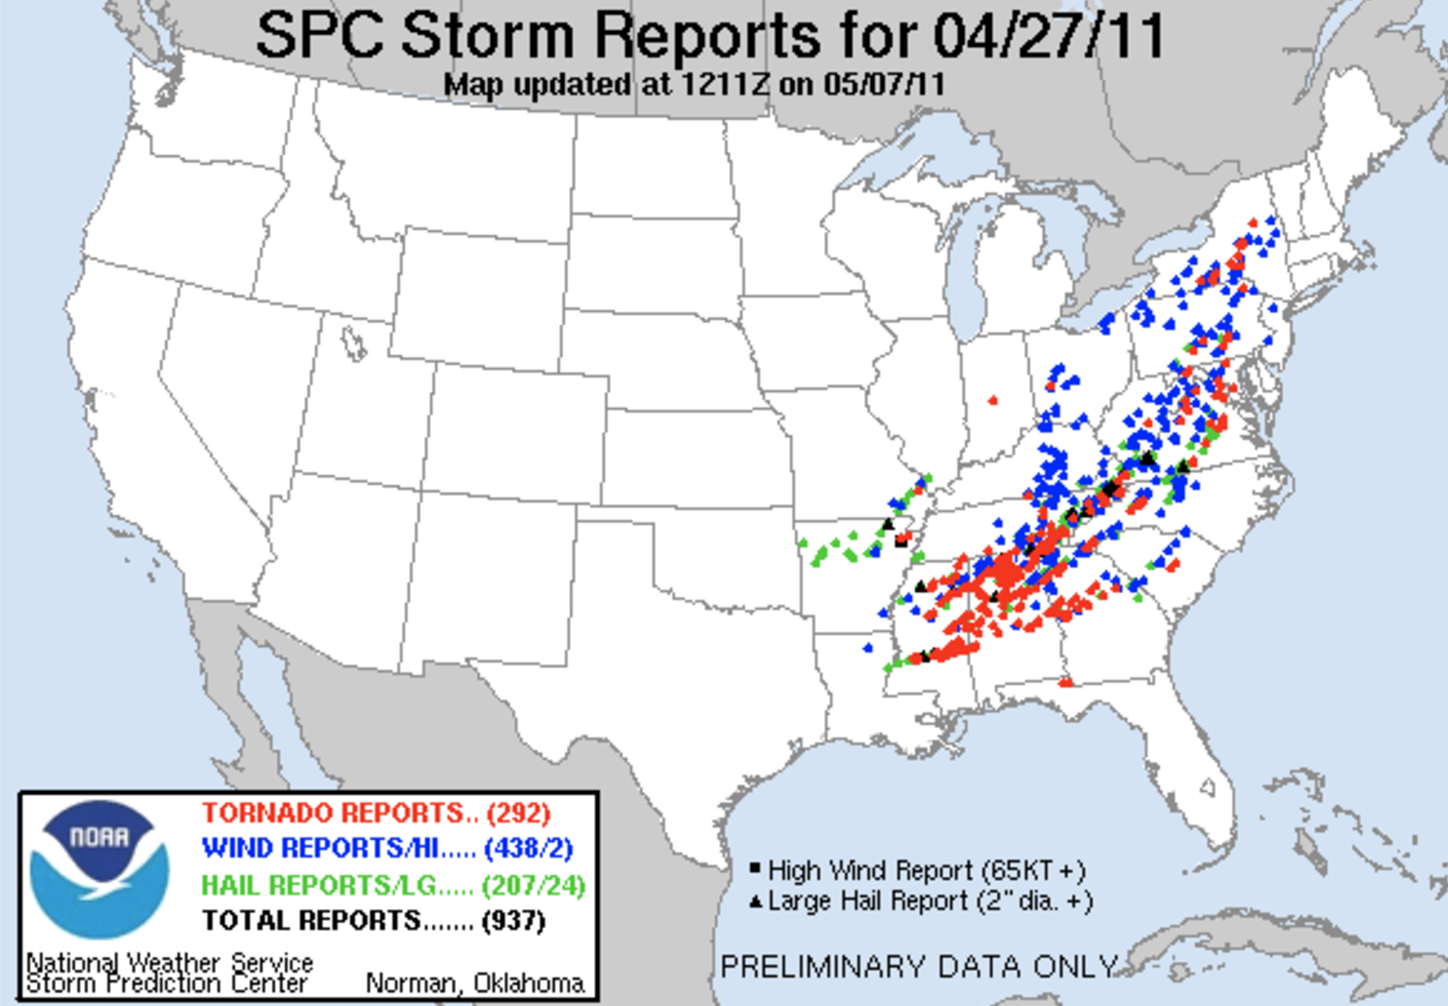


two Isotachs, wind barbs and 300 hPa heights

In [3]:
from datetime import datetime, timedelta

from metpy.plots import declarative
from metpy.units import units
from siphon.catalog import TDSCatalog
import xarray as xr

import matplotlib.pyplot as plt
import metpy.calc as mpcalc
from metpy.units import units
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

In [25]:
# Set the date/time of the model run
### SET THE APPROPRIATE DATE/TIME ###
date = datetime(2011, 4, 27, 18)
#####################################

# Data Available December 6, 2007 at 06 UTC through December 31, 2023 at 18 UTC
#ds = xr.open_dataset('https://rda.ucar.edu/thredds/dodsC/aggregations/g/ds083.2/2/TP')
url = 'https://thredds.rda.ucar.edu/thredds/dodsC/aggregations/g/ds083.2/2/ds083.2_Grib2-2023'
ds = xr.open_dataset(url)

# Subset data to be just over the U.S. for plotting purposes
#ds = ds.sel(lat=slice(70,10), lon=slice(360-150, 360-55))

In [26]:
ds

<xarray.Dataset>
Dimensions:                                                                   (
                                                                               lat: 181,
                                                                               lon: 360,
                                                                               time: 11923,
                                                                               time1: 2886,
                                                                               time2: 19417,
                                                                               ...
                                                                               depth_below_surface_layer_bounds_1: 2,
                                                                               height_above_ground_layer_bounds_1: 2,
                                                                               pressure_difference_layer1_bounds_1: 2,
                                                                               sigma_layer_bounds_1: 2,
                                                                               height_above_ground_layer1_bounds_1: 2,
                                                                               pressure_difference_layer2_bounds_1: 2)
Coordinates: (12/45)
  * lat                                                                       (lat) float32 ...
  * lon                                                                       (lon) float32 ...
  * time                                                                      (time) datetime64[ns] ...
    reftime                                                                   (time) datetime64[ns] ...
  * time1                                                                     (time1) datetime64[ns] ...
    reftime1                                                                  (time1) datetime64[ns] ...
    ...                                                                        ...
  * height_above_ground_layer1                                                (height_above_ground_layer1) float32 ...
  * pressure_difference_layer2                                                (pressure_difference_layer2) float32 ...
  * height_above_ground4                                                      (height_above_ground4) float32 ...
  * height_above_ground5                                                      (height_above_ground5) float32 ...
  * altitude_above_msl                                                        (altitude_above_msl) float32 ...
  * altitude_above_msl1                                                       (altitude_above_msl1) float32 ...
Dimensions without coordinates: pressure_difference_layer_bounds_1,
                                depth_below_surface_layer_bounds_1,
                                height_above_ground_layer_bounds_1,
                                pressure_difference_layer1_bounds_1,
                                sigma_layer_bounds_1,
                                height_above_ground_layer1_bounds_1,
                                pressure_difference_layer2_bounds_1
Data variables: (12/141)
    LatLon_Projection                                                         int32 ...
    pressure_difference_layer_bounds                                          (pressure_difference_layer, pressure_difference_layer_bounds_1) float32 ...
    depth_below_surface_layer_bounds                                          (depth_below_surface_layer, depth_below_surface_layer_bounds_1) float32 ...
    height_above_ground_layer_bounds                                          (height_above_ground_layer, height_above_ground_layer_bounds_1) float32 ...
    pressure_difference_layer1_bounds                                         (pressure_difference_layer1, pressure_difference_layer1_bounds_1) float32 ...
    sigma_layer_bounds                                                  

In [11]:
ds['u-component_of_wind_isobaric'].shape

(22306, 41, 61, 96)

In [81]:
mstokt = 1.94384
subset = dict(lat=slice(70,10), lon=slice(360-150, 360-55),
              time=date, vertical=30000)  #date limits it to one time specifed above!
uwnd = ds['u-component_of_wind_isobaric'].metpy.sel(subset)
vwnd = ds['v-component_of_wind_isobaric'].metpy.sel(subset)
#Convert to kt
WSPD = mpcalc.wind_speed(uwnd,vwnd)*mstokt
geopot = ds['Geopotential_height_isobaric'].metpy.sel(subset)
#vwnd = ds_subset['v-component_of_wind_isobaric'].metpy.sel(subset)

In [83]:
print(uwnd.shape)
print(vwnd.shape)
print(WSPD.shape)
print(geopot.shape)

(61, 96)
(61, 96)
(61, 96)
(61, 96)


In [85]:
WSPD.values

array([[28.266668, 29.81625 , 31.415728, ..., 20.283112, 20.780005,
        20.180393],
       [22.597088, 25.425694, 27.840376, ..., 14.017231, 15.390745,
        16.068163],
       [14.803844, 18.616264, 21.782286, ...,  8.035846,  9.930721,
        11.41582 ],
       ...,
       [47.852036, 46.847755, 44.87703 , ..., 28.396704, 26.36538 ,
        30.199667],
       [54.140743, 51.578835, 49.2141  , ..., 25.054432, 28.17026 ,
        29.998182],
       [57.377865, 55.366352, 52.626038, ..., 21.523146, 22.525072,
        21.127136]], dtype=float32)

In [87]:
uwnd.lat.values

array([70., 69., 68., 67., 66., 65., 64., 63., 62., 61., 60., 59., 58.,
       57., 56., 55., 54., 53., 52., 51., 50., 49., 48., 47., 46., 45.,
       44., 43., 42., 41., 40., 39., 38., 37., 36., 35., 34., 33., 32.,
       31., 30., 29., 28., 27., 26., 25., 24., 23., 22., 21., 20., 19.,
       18., 17., 16., 15., 14., 13., 12., 11., 10.], dtype=float32)

In [89]:
geopot.values

array([[8827.48, 8822.48, 8817.14, ..., 8518.85, 8523.17, 8527.38],
       [8842.67, 8838.12, 8834.72, ..., 8518.36, 8520.96, 8523.1 ],
       [8852.87, 8851.22, 8847.75, ..., 8516.08, 8517.28, 8518.35],
       ...,
       [9605.93, 9606.21, 9605.89, ..., 9684.93, 9685.04, 9685.16],
       [9615.57, 9615.31, 9615.83, ..., 9692.54, 9692.01, 9690.84],
       [9624.14, 9624.24, 9624.52, ..., 9696.54, 9695.68, 9694.87]],
      dtype=float32)

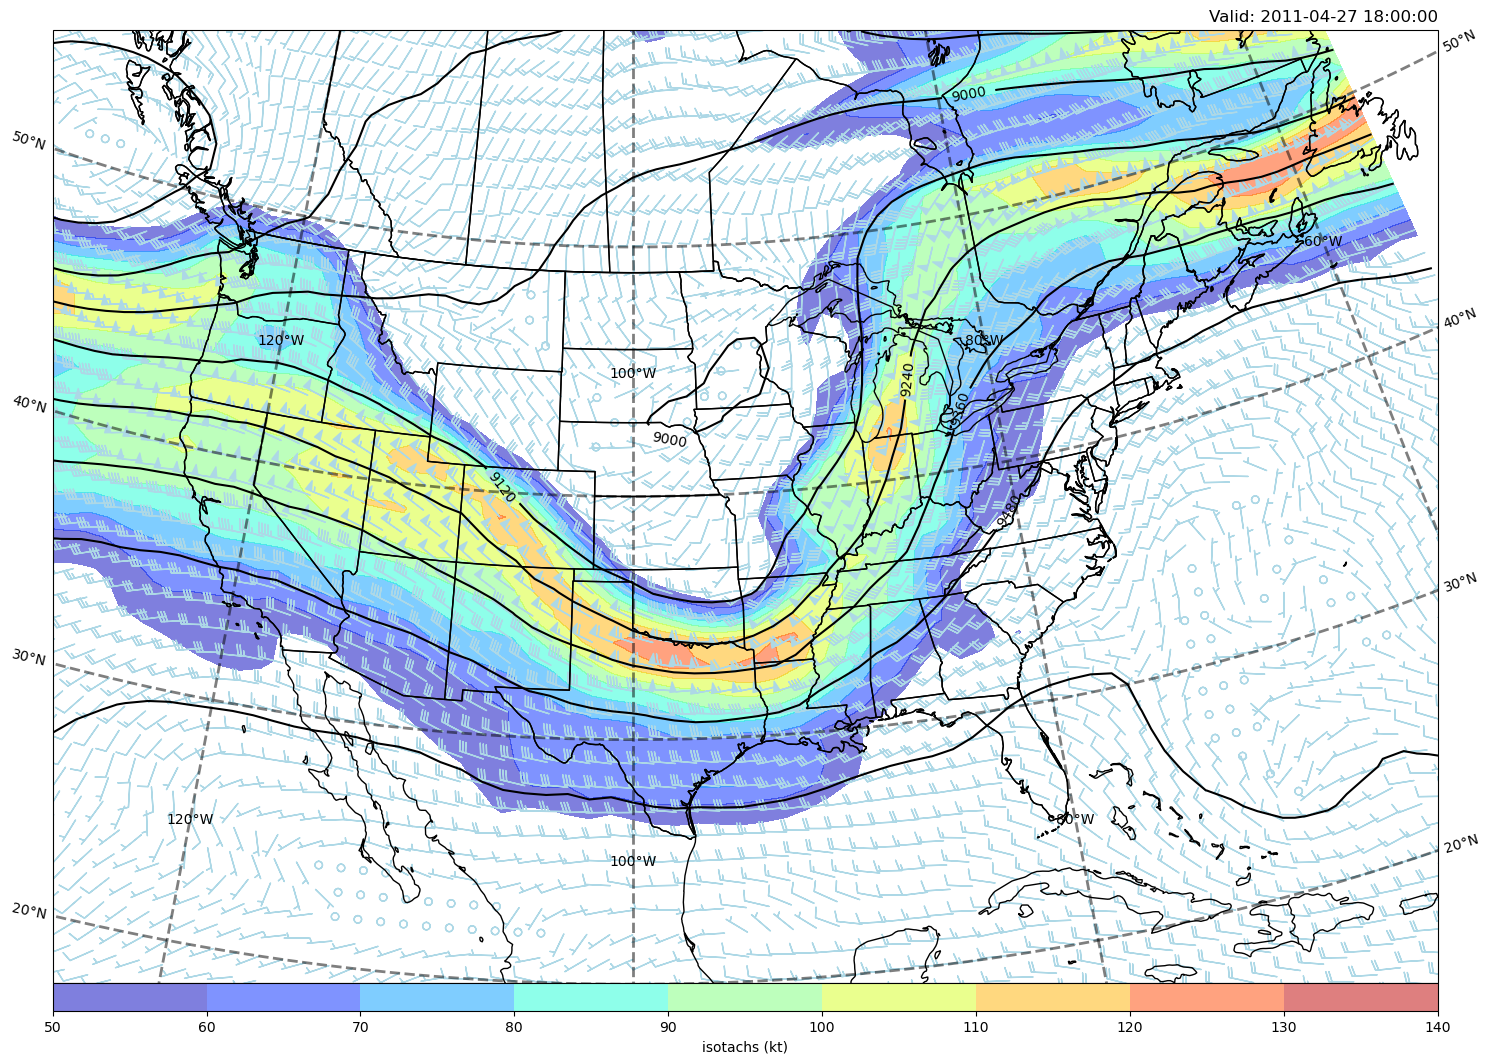

In [206]:
# Plotting

plt.figure(1, figsize=(15, 13))
ax = plt.subplot(111, projection=ccrs.LambertConformal(central_longitude=-100, standard_parallels=(25, 40)))
ax.set_extent([-125, -65, 20, 55], ccrs.PlateCarree())

# Contour Heights             

cs = ax.contour(uwnd.lon.values, uwnd.lat.values, geopot.values, np.arange(0, 10000, 120),
                colors='black', transform=ccrs.PlateCarree())
plt.clabel(cs)

# Isotachs
#2
cf = ax.contourf(uwnd.lon.values, uwnd.lat.values, WSPD.values, np.arange(50, 150, 10), alpha=0.5,
                 cmap='jet',transform=ccrs.PlateCarree())
                 #cmap=plt.cm.Greens, norm=plt.Normalize(65, 110), transform=ccrs.PlateCarree())
#DRL the "Normalize" object remaps the color table - in this case to a larger rh spread so that we don't use the darkest greens
plt.colorbar(cf, orientation='horizontal', pad=0, aspect=50, label='isotachs (kt)')

#3
# Add wind barbs in knots
# ax.barbs(uwnd.lon.values, uwnd.lat.values, uwnd.data, vwnd.data, length=6,color='lightblue',
#          sizes=dict(spacing=0.25),transform=ccrs.PlateCarree())
#DRL Subsample wind barbs  - here I leave at full density since n = 1
ax.barbs(uwnd[::1].lon.values, uwnd[::1].lat.values, uwnd[::1].data, vwnd[::1].data, length=6,color='lightblue',
         transform=ccrs.PlateCarree())

#********
# Add Geographic Features
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True

# Add titles
#plt.title(f'{level.m} K Pressure (hPa), Rel. Hum. (%), Wind Barbs', loc='left')
plt.title(f'Valid: {date}', loc='right')
plt.tight_layout() 
plt.savefig('jetstreak_300.png')
plt.show()